# Jupyter Notebook
Wie bereits erkennbar besteht eine Jupyternotebook aus Zellen. In der Regel kann eine Zelle entweder einen Beschreibenend Text beihnalten welcher mittels Markdown Syntax editiert wird oder Code in einer dezidierten Programmiersprache, wie Python.

Jupyter Notebooks sind Grundsätzlich Web Applikationen welche als Dokument geteilt und versendet werden können. In der Regel beinhaltet ein Notebook Code, Gleichungen, Visualisierungen und Text. Besonder eignen sich Jupyter Notebooks dazu Datenanalysenschritte aufzuzeigen, diese zu beschreiben und entpsrechende Visualisierungen einzubetten. Dadurch haben sich Jupyter Notebooks besonder im Data Science Bereich als unerlässliches Werkzeug etableirt.

Dies ist eine Markdown Zelle und erlaubt das formattiern von Text in der entsprechenden Syntax

'Hello Jupyter!'

**'Hello Jupyter!'**

_'Hello Jupyter!'_

In [8]:
# Eine Python Code Zelle kann wie gewohnt kommentiert werden
print('Hello Jupyter!')

Hello Jupyter!


# Python Pakete laden
Wie in einem Python Script werden entsprechende Module geladen. Wichtig hier ist das man entsprechende Zellen nicht unbedingt in Reihenfolge ausführen muss.

Pandas wird oft als pd geladen um entpsrechend code zu kürzen
The pyplot visualization module is the interface for the matplotlib package, it is often loaded as plt

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Datensatz laden
Hierzu werden die Daten of als Pandas Dataframe gespeichert. Dieses Dataframe kann dann einfach manipuliert werden. Weiter ist eine Vielzahl and Funktionen vorhanden welche dein solches Dataframe als Input verwenden.

In [2]:
df = pd.read_csv('heart.csv')

Der nun im dataframe "df" gespeicherte Datensatz ist Trainings und Benchmark Datensatz welcher auf Kaggle.com veröffentlicht wurde. Kaggle ist eine Organisation von Data Science Wettbewerben. Dabei werden mehrere Tausend Datenstätze bereitgestellt mit welche Datengestützte Modelle für Prediktive Analysen trainiert werden können. Dabei können entsprechende Modelle unter der Community verglichen werden was den Wettbewerbsaspekt der Platform bildet.

https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

<img src='hearts.jpg' width="800" height="300">


# Datensatz inspizieren
Es ist unerlässlich den Datensatz auf Vollstendigkeit und art der erhobenen Daten zu überprüfen. Dabei spielen Lücken in einer Serie (Bsp. fehlende Daten in einer Kolonne in einem Dataframe), Typ der Daten (Bsp. Integer, Float, Strin, etc.), Duplikate (Bsp. Kolonne doppelt erfasst) und Integrität (Bsp."na" anstatt 0) eine wichtige Rolle

Um einen Überblick zu erhalten werden die obersten Datenreihen im Dataframe inspiziert.

In [3]:
df.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
df.sample(4)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
77,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0


Der Datensatz besteht setzt sich somit aus einer vielzahl an Paramtern zusammen welche von Patienten erfasst wurden. Dabei ist jede Kolonne eine Pandas Serie welche zusammen das Dataframe bilden.

Parameter:
* Age : Age of the patient
* Sex : Sex of the patient
* exang: exercise induced angina (1 = yes; 0 = no)
* ca: number of major vessels (0-3)
* cp : Chest Pain type chest pain type
    Value 1: typical angina
    Value 2: atypical angina
    Value 3: non-anginal pain
    Value 4: asymptomatic
* trtbps : resting blood pressure (in mm Hg)
* chol : cholestoral in mg/dl fetched via BMI sensor
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg : resting electrocardiographic results
    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach : maximum heart rate achieved
* Output : 0= less chance of heart attack 1= more chance of heart attack

Der info() command gibt ebenfalls einen überblick über das Dataframe. Besonders wichtig hier ist der Dtype welcher beschreibt im welchem Datentyp die jeweiligen Kolonnen erfasst sind.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# Daten Visualisieren
Matplotlib, Seaborn, Plotly Express oder ggplot, um nur einizge zu nennen, sind Visalisierungs-Pakete für Python. Jedes dieser Werkzeuge hat Vor-und Nachteile im Bezug die Syntax, Zielplot und Dateninput. Einige sind ausgelegt auf grosse Datenmene andere auf einfaches Userinterface oder wurden von anderen Programmiersprachen zu Python portiert. Somit ist es of der Fall das man je nach Zielplot zwischen diese Paketen wechselt oder man sich auf eines fixiert aufgrund des Interfaces oder anderen Gründen. Zwei der meistverbreiteten Pakete sowie die Visualisierungsfunktion in Pandas werden in diesem Kapitel verwendet.

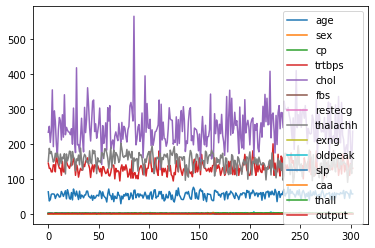

In [43]:
df.plot()

<function matplotlib.pyplot.show(*args, **kw)>

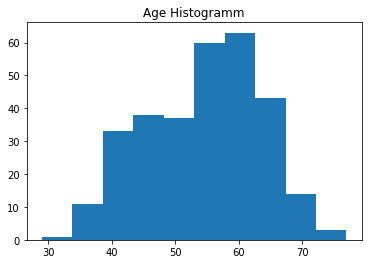

In [37]:
plt.hist(df["age"])
plt.title("Age Histogramm")
plt.show

In [42]:
corr = df.corr()
fig = px.imshow(corr)
fig.show()

In [31]:
corr.style.background_gradient(cmap='coolwarm')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696
